In [103]:
!pip install numpy pandas 
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install pandas
!pip show pandas




ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [150]:
# === Thư viện cơ bản ===
import pandas as pd               # Xử lý dữ liệu dạng bảng
import numpy as np                # Xử lý mảng số, vector, thống kê
import seaborn as sns             # Trực quan hóa dữ liệu nâng cao
import matplotlib.pyplot as plt   # Vẽ biểu đồ cơ bản

# Hiển thị biểu đồ trực tiếp trong notebook
%matplotlib inline                

import datetime                   # Thao tác với dữ liệu thời gian
import warnings
warnings.filterwarnings('ignore')  # Ẩn cảnh báo để notebook sạch hơn

# === Cấu hình chủ đề biểu đồ cho Seaborn ===
sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font='Lucida Calligraphy',
              font_scale=1.5,
              color_codes=True,
              rc=None)

# === Thiết lập chi tiết các tham số hiển thị biểu đồ Matplotlib ===
plt.rcParams['figure.figsize'] = (14,8)               # Kích thước biểu đồ mặc định
plt.rcParams['figure.facecolor'] = '#F0F8FF'          # Màu nền biểu đồ
plt.rcParams['figure.titlesize'] = 'medium'           # Cỡ tiêu đề biểu đồ
plt.rcParams['figure.dpi'] = 50                       # Độ phân giải thấp (50 dpi)
plt.rcParams['figure.edgecolor'] = 'green'            # Màu viền biểu đồ
plt.rcParams['figure.frameon'] = True                 # Bật khung viền

plt.rcParams["figure.autolayout"] = True              # Tự căn lề để tránh chồng lấn

plt.rcParams['axes.facecolor'] = '#F5F5DC'            # Nền trục (màu beige)
plt.rcParams['axes.titlesize'] = 25
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center'
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Olive'
plt.rcParams["axes.axisbelow"] = False
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2

plt.rcParams["xtick.bottom"] = True
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True
plt.rcParams['ytick.color'] = '#A52A2A'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3

plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.facecolor'] =  'NavajoWhite'
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20

plt.rcParams['font.family'] = 'Lucida Calligraphy'    # Font chữ mặc định
plt.rcParams['font.size'] = 14

plt.rcParams['figure.dpi'] = 50
plt.rcParams['figure.edgecolor'] = 'Blue'


In [141]:
pd.set_option('display.max_columns', None)  # Hiển thị đầy đủ tất cả các cột trong DataFrame, không bị rút gọn khi in ra


In [151]:
# Đọc dữ liệu tổng quan về máy biến áp từ file CSV
tf = pd.read_csv('./archive/Overview.csv')  # Đọc dữ liệu từ file CSV (cần có thư mục 'archive')

# Hiển thị kích thước của bảng dữ liệu (số dòng, số cột)
display(tf.shape)

# Hiển thị 5 dòng đầu tiên để xem cấu trúc và giá trị
tf.head()


(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [152]:
# Chuyển cột 'DeviceTimeStamp' về định dạng datetime để dễ xử lý thời gian
# 'errors="coerce"' sẽ tự động chuyển các giá trị không hợp lệ thành NaT (giá trị thiếu thời gian)
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], errors='coerce')

# Xem 5 dòng đầu tiên sau khi chuyển đổi định dạng thời gian
tf.head()


,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [154]:
# Đọc dữ liệu dòng điện và điện áp từ file CSV
cv = pd.read_csv('./archive/CurrentVoltage.csv')  # Tạo DataFrame tên 'cv'

# Hiển thị kích thước của bảng (số dòng, số cột)
display(cv.shape)

# Hiển thị 5 dòng đầu tiên để xem nội dung bảng
cv.head()


(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Chuyển cột 'DeviceTimeStamp' từ dạng chuỗi sang định dạng thời gian (datetime64)
# Nếu có dữ liệu lỗi định dạng, sẽ bị thay bằng NaT (giá trị thời gian trống)
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], errors='coerce')

# Xem 5 dòng đầu tiên để kiểm tra kết quả chuyển đổi
cv.head()


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# Ghép 2 bảng 'tf' và 'cv' lại dựa trên cột thời gian chung 'DeviceTimeStamp'
# Kết quả là bảng mới 'transformer' chứa tất cả các cột từ cả 2 bảng
transformer = pd.merge(tf, cv, on='DeviceTimeStamp')  # mặc định là join kiểu 'inner'

# Hiển thị 5 dòng bất kỳ từ bảng mới để kiểm tra dữ liệu sau khi merge
transformer.sample(5)


,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
13123,2019-11-27 16:45:00,30.0,0.0,28.0,100.0,0.0,0.0,0.0,241.3,240.3,238.9,100.6,80.8,123.2,417.8,415.0,417.9,36.7
10249,2019-10-19 00:15:00,30.0,0.0,27.0,67.0,0.0,0.0,0.0,241.0,240.9,240.4,99.7,51.1,92.4,418.2,415.5,418.6,44.7
8104,2019-09-27 00:45:00,29.0,0.0,27.0,48.0,0.0,0.0,0.0,232.1,234.1,230.2,78.1,58.9,92.8,402.6,403.2,399.0,29.7
16550,2020-02-10 00:15:00,21.0,1.0,19.0,100.0,0.0,0.0,0.0,252.1,251.2,250.2,42.5,21.4,48.9,435.9,433.6,436.2,24.9
16584,2020-02-13 01:45:00,19.0,1.0,17.0,100.0,0.0,0.0,0.0,254.7,253.9,253.4,34.7,17.8,35.7,440.7,438.7,441.0,17.3


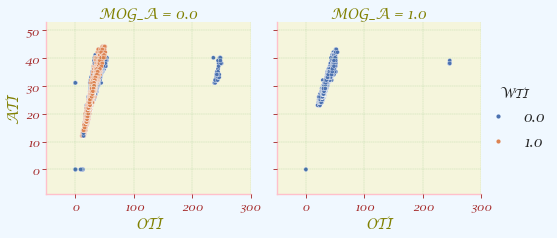

In [172]:
# Vẽ biểu đồ quan hệ giữa OTI (nhiệt độ cuộn dây) và ATI (nhiệt độ môi trường)
# Mỗi điểm được tô màu theo WTI (nhiệt độ dầu)
# Dữ liệu được chia thành 2 biểu đồ con theo giá trị MOG_A (0 hoặc 1)
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI", col="MOG_A");


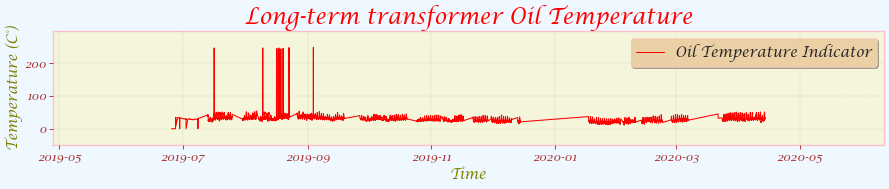

In [173]:
# VẼ BIỂU ĐỒ THEO DÕI NHIỆT ĐỘ DẦU TRONG THỜI GIAN DÀI

plt.figure(figsize=(18,4))  # Tạo biểu đồ với kích thước dài ngang (phù hợp với dữ liệu thời gian)

# Vẽ đường biểu diễn nhiệt độ dầu theo thời gian
plt.plot(transformer.DeviceTimeStamp, transformer.OTI,
         label="Oil Temperature Indicator", color='red')

# Tiêu đề biểu đồ
plt.title("Long-term transformer Oil Temperature", fontsize=30, color='Red')

plt.legend()                 # Hiển thị chú thích
plt.xlabel("Time")           # Nhãn trục X
plt.ylabel("Temperature (C°)")  # Nhãn trục Y
plt.show()                   # Hiển thị biểu đồ


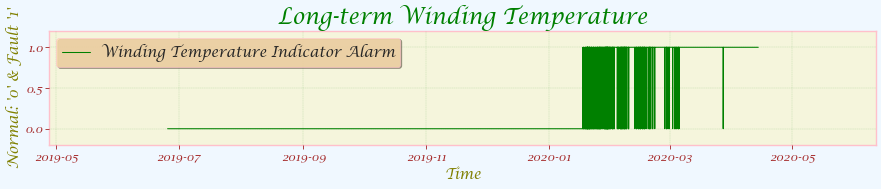

In [174]:
# VẼ BIỂU ĐỒ CẢNH BÁO NHIỆT ĐỘ CUỘN DÂY TRONG THỜI GIAN DÀI

plt.figure(figsize=(18,4))  # Tạo biểu đồ dài ngang để phù hợp dữ liệu thời gian

# Vẽ đường biểu diễn chỉ số cảnh báo nhiệt độ cuộn dây (0: bình thường, 1: cảnh báo)
plt.plot(transformer.DeviceTimeStamp, transformer.WTI,
         label="Winding Temperature Indicator Alarm", color='green')

# Tiêu đề biểu đồ
plt.title("Long-term Winding Temperature", fontsize=30, color='Green')

plt.legend()                             # Hiển thị chú thích
plt.xlabel("Time")                       # Nhãn trục thời gian
plt.ylabel("Normal: '0' & Fault '1'")    # Nhãn trục Y cho cảnh báo nhị phân
plt.show()                               # Hiển thị biểu đồ


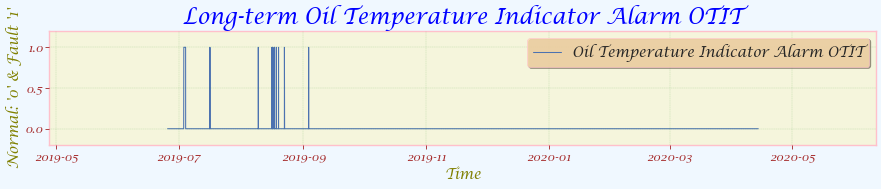

In [175]:
# VẼ BIỂU ĐỒ CẢNH BÁO NHIỆT ĐỘ DẦU TỪ CẢM BIẾN OTIT (Oil Temperature Indicator Alarm)

plt.figure(figsize=(18,4))  # Tạo biểu đồ có chiều ngang lớn, dễ nhìn theo thời gian

# Vẽ đường thể hiện trạng thái cảnh báo nhiệt độ dầu: 0 (bình thường), 1 (lỗi)
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A,
         label="Oil Temperature Indicator Alarm OTIT")

# Thiết lập tiêu đề biểu đồ
plt.title("Long-term Oil Temperature Indicator Alarm OTIT", fontsize=30, color='Blue')

plt.legend()                             # Hiển thị chú thích
plt.xlabel("Time")                       # Nhãn trục thời gian
plt.ylabel("Normal: '0' & Fault '1'")    # Nhãn cho trục Y: cảnh báo nhị phân
plt.show()                               # Hiển thị biểu đồ


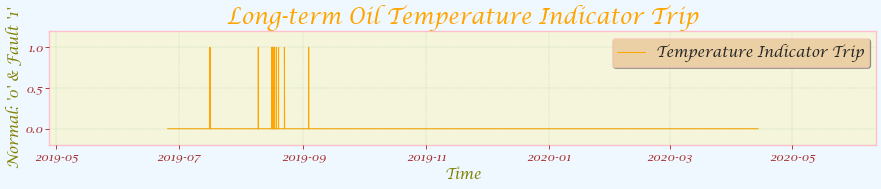

In [176]:
# VẼ BIỂU ĐỒ THEO DÕI THỜI ĐIỂM MÁY BIẾN ÁP VƯỢT NGƯỠNG NHIỆT ĐỘ (CHẾ ĐỘ NGẮT)

plt.figure(figsize=(18,4))  # Thiết lập kích thước biểu đồ ngang

# Vẽ đường biểu diễn trạng thái cảnh báo nhiệt độ dầu vượt ngưỡng
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T,
         label="Temperature Indicator Trip", color='Orange')

plt.title("Long-term Oil Temperature Indicator Trip", fontsize=30, color='Orange')  # Tiêu đề

plt.legend()                                # Hiển thị chú thích
plt.xlabel("Time")                          # Nhãn trục X: thời gian
plt.ylabel("Normal: '0' & Fault '1'")       # Nhãn trục Y: 0 là bình thường, 1 là lỗi
plt.show()                                  # Vẽ biểu đồ


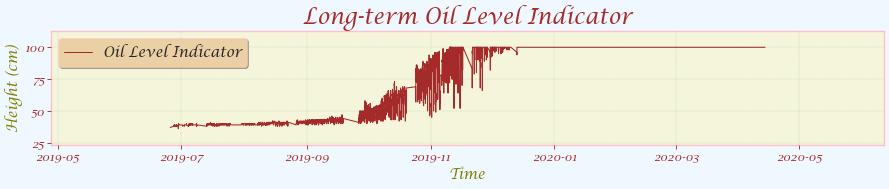

In [177]:
# VẼ BIỂU ĐỒ THEO DÕI MỰC DẦU CỦA MÁY BIẾN ÁP TRONG THỜI GIAN DÀI

plt.figure(figsize=(18,4))  # Kích thước biểu đồ ngang lớn, dễ quan sát theo thời gian

# Vẽ đường biểu diễn mực dầu theo thời gian
plt.plot(transformer.DeviceTimeStamp, transformer.OLI,
         label="Oil Level Indicator", color='Brown')

# Tiêu đề biểu đồ
plt.title("Long-term Oil Level Indicator", fontsize=30, color='Brown')

plt.legend()                 # Hiển thị chú thích
plt.xlabel("Time")           # Nhãn trục thời gian
plt.ylabel("Height (cm)")    # Nhãn trục mực dầu (chiều cao theo cm)
plt.show()                   # Hiển thị biểu đồ


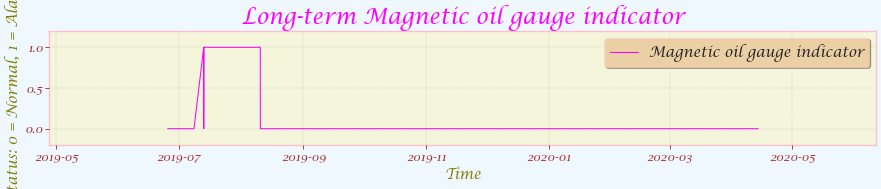

In [178]:
# VẼ BIỂU ĐỒ CẢNH BÁO TỪ CẢM BIẾN MOG_A (MAGNETIC OIL GAUGE)

plt.figure(figsize=(18,4))  # Biểu đồ ngang để theo dõi theo thời gian

# Vẽ biểu đồ trạng thái cảnh báo mực dầu từ cảm biến MOG
plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A,
         label="Magnetic oil gauge indicator", color='Magenta')

# Tiêu đề biểu đồ
plt.title("Long-term Magnetic oil gauge indicator", fontsize=30, color='Magenta')

plt.legend()                      # Hiển thị chú thích
plt.xlabel("Time")                # Nhãn trục thời gian
plt.ylabel("Status: 0 = Normal, 1 = Alarm")  #  '0 (Normal) / 1 (Alarm)'
plt.show()                        # Vẽ biểu đồ


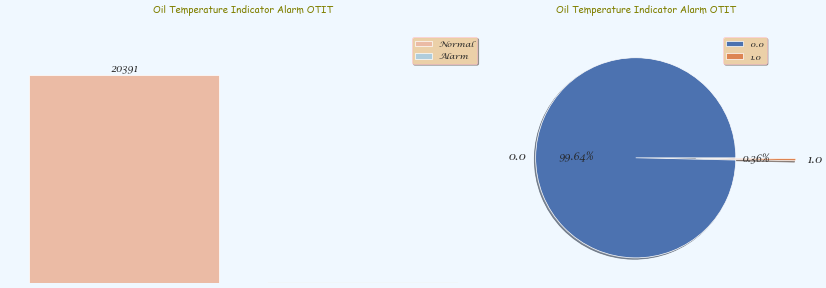

In [184]:
# === Cấu hình cỡ chữ hiển thị ===
plt.rcParams['legend.fontsize'] = 12           # Cỡ chữ chú thích
plt.rcParams["axes.labelsize"] = 20            # Cỡ chữ nhãn trục

plt.figure(figsize=(18,6))  # Tạo khung 2 biểu đồ (1 hàng, 2 cột)

# === Biểu đồ 1: Cột đếm số lượng cảnh báo OTIT ===
ax = plt.subplot(1,2,1)  # Vị trí 1 trong 2 subplot
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')  # Biểu đồ đếm số 0/1

ax.bar_label(ax.containers[0])  # Hiển thị số lượng trên mỗi cột

plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20, color='Olive',
          font='Comic Sans MS', pad=30)  # Tiêu đề biểu đồ

plt.legend(labels=['Normal','Alarm'])  # Tên chú thích theo giá trị 0/1
plt.axis('off')  # Ẩn khung và trục

# === Biểu đồ 2: Pie chart phần trăm OTIT ===
ax = plt.subplot(1,2,2)  # Vị trí 2 trong 2 subplot
ax = transformer['OTI_A'].value_counts().plot.pie(
    explode=[0.1, 0.5],        # Tách lát pie cho dễ nhìn
    autopct='%1.2f%%',         # Hiển thị % (2 chữ số thập phân)
    shadow=True                # Bóng đổ
)

ax.set_title(label="Oil Temperature Indicator Alarm OTIT",
             fontsize=20, color='Olive', font='Comic Sans MS', pad=30)

plt.legend()      # Tự sinh chú thích theo giá trị
plt.axis('off');   # Ẩn trục của pie chart


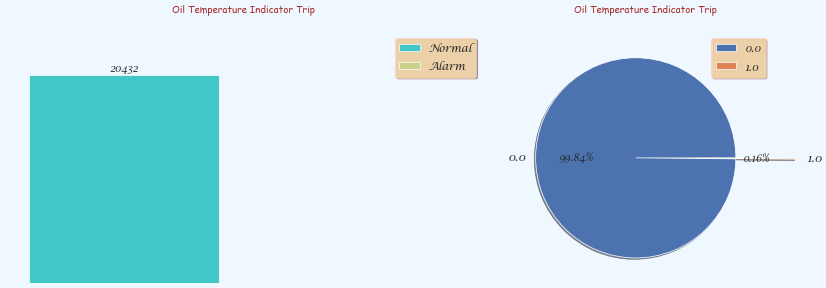

In [186]:
# === Cấu hình style biểu đồ ===
plt.rcParams['legend.fontsize'] = 15          # Cỡ chữ chú thích
plt.rcParams["axes.labelsize"] = 20           # Cỡ chữ trục
plt.rcParams["axes.labelcolor"] = 'brown'     # Màu chữ trục

plt.figure(figsize=(18,6))  # Tạo khung biểu đồ ngang

# === Biểu đồ 1: Đếm số lần OTI_T trip ===
ax = plt.subplot(1,2,1)  # Vị trí 1 trong 2 biểu đồ
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')  # Biểu đồ cột đếm giá trị 0/1
ax.bar_label(ax.containers[0])  # Hiển thị số trên cột

plt.title("Oil Temperature Indicator Trip", fontsize=30, color='Brown',
          font='Comic Sans MS', pad=30)  # Tiêu đề biểu đồ

plt.legend(labels=['Normal','Alarm'])  # Gán nhãn 0/1
plt.axis('off')  # Ẩn trục

# === Biểu đồ 2: Pie chart tỷ lệ OTI_T ===
ax = plt.subplot(1,2,2)
ax = transformer['OTI_T'].value_counts().plot.pie(
    explode=[0.1, 0.5],         # Tách lát nhỏ và lớn
    autopct='%1.2f%%',          # Hiển thị phần trăm
    shadow=True                 # Đổ bóng
)

ax.set_title(label="Oil Temperature Indicator Trip", fontsize=30,
             color='Brown', font='Comic Sans MS', pad=30)

plt.legend()
plt.axis('off');  # Ẩn trục


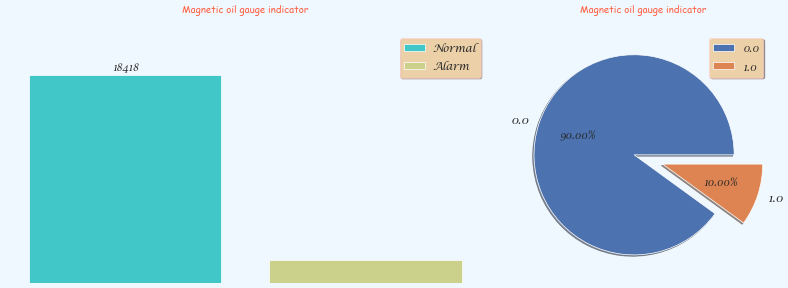

In [188]:
# === BIỂU ĐỒ PHÂN PHỐI CẢNH BÁO TỪ CẢM BIẾN MOG_A ===

plt.figure(figsize=(18,6))  # Tạo khung gồm 2 biểu đồ ngang

# === BIỂU ĐỒ 1: Đếm số lượng MOG_A = 0 và 1 ===
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')  # Đếm cảnh báo 0/1

ax.bar_label(ax.containers[0])  # Hiển thị số lượng trên từng cột

plt.title("Magnetic oil gauge indicator", fontsize=30,
          color='Tomato', font='Comic Sans MS', pad=30)  # Tiêu đề

plt.legend(labels=['Normal','Alarm'])  # Chú thích giá trị 0/1
plt.axis('off')                        # Ẩn trục và khung

# === BIỂU ĐỒ 2: Biểu đồ tròn phần trăm MOG_A ===
ax = plt.subplot(1,2,2)
ax = transformer['MOG_A'].value_counts().plot.pie(
    explode=[0.1, 0.2],           # Làm nổi bật từng lát
    autopct='%1.2f%%',            # Hiển thị phần trăm
    shadow=True                   # Thêm bóng đổ
)

ax.set_title(label="Magnetic oil gauge indicator",
             fontsize=30, color='Tomato',
             font='Comic Sans MS', pad=30)  # Tiêu đề biểu đồ tròn

plt.legend()     # Tự sinh chú thích 0/1
plt.axis('off');  # Ẩn trục của biểu đồ pie


In [189]:
# TÁCH DỮ LIỆU THÀNH TẬP ĐẶC TRƯNG (X) VÀ NHÃN MỤC TIÊU (y)

# X = tất cả các cột trừ 'DeviceTimeStamp' và 'MOG_A' (label)
X = transformer.drop(['DeviceTimeStamp', 'MOG_A'], axis=1)

# y = biến mục tiêu cần dự đoán
y = transformer['MOG_A']


In [191]:
# CHIA DỮ LIỆU THÀNH TẬP HUẤN LUYỆN VÀ TẬP KIỂM TRA

from sklearn.model_selection import train_test_split  # Hàm chia dữ liệu

# Tách dữ liệu thành 80% train và 20% test (có random_state để tái lập)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=21
)


In [192]:
# CHUẨN HÓA DỮ LIỆU: ĐƯA VỀ KHOẢNG [0, 1] TRƯỚC KHI HUẤN LUYỆN MÔ HÌNH

from sklearn.preprocessing import MinMaxScaler  # Import bộ chuẩn hóa

scaler = MinMaxScaler()  # Khởi tạo đối tượng MinMaxScaler

# Fit scaler trên X_train, sau đó transform sang dạng chuẩn hóa
X_train = scaler.fit_transform(X_train)

# Chỉ transform X_test (dùng min/max đã học từ X_train)
X_test = scaler.transform(X_test)


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.88 %
--------------------------------------------------------
Classification_Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.94      0.95      0.94       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093

--------------------------------------------------------


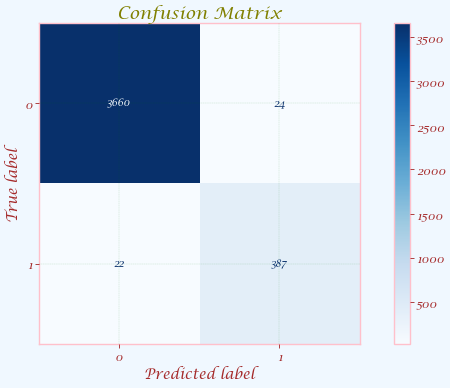

In [193]:
# === HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ===

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Khởi tạo mô hình Random Forest với 100 cây
random_forest = RandomForestClassifier(n_estimators=100)

# Huấn luyện mô hình với tập train
random_forest.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = random_forest.predict(X_test)

# Tính độ chính xác trên tập train và test
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

# In kết quả
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report:\n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


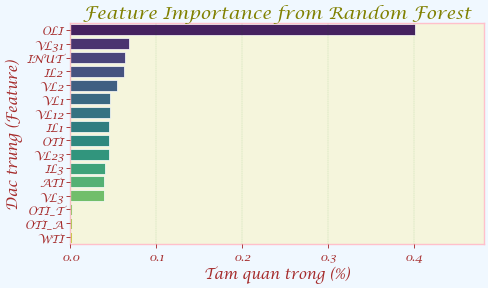

In [194]:
# === PHÂN TÍCH ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG TRONG RANDOM FOREST ===

# Lưu tên đặc trưng (giả sử X gốc chưa bị ghi đè)
feature_names = X.columns

# Lấy tầm quan trọng từ mô hình đã huấn luyện
importances = random_forest.feature_importances_

# Tạo DataFrame chứa đặc trưng và độ quan trọng, rồi sắp giảm dần
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# === VẼ BIỂU ĐỒ TẦM QUAN TRỌNG ===
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Tam quan trong (%)')
plt.ylabel('Dac trung (Feature)')
plt.tight_layout()
plt.show()


In [195]:
# === TIỀN XỬ LÝ DỮ LIỆU ĐỂ HUẤN LUYỆN LSTM ===

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Lấy đặc trưng (X) và nhãn (y) từ merged_df
X = merged_df[feature_cols].values
y = merged_df['MOG_A'].values  # Nhãn cần dự đoán (0 hoặc 1)

# Chuẩn hóa dữ liệu đặc trưng về khoảng [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Hàm tạo chuỗi dữ liệu theo phương pháp sliding window (dạng LSTM cần)
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])     # Lấy chuỗi đầu vào dài window_size
        y_seq.append(y[i + window_size])       # Nhãn tương ứng là tại bước tiếp theo
    return np.array(X_seq), np.array(y_seq)

# Thiết lập độ dài chuỗi
window_size = 3

# Tạo dữ liệu chuỗi (dùng cho RNN, LSTM)
X_seq, y_seq = create_sequences(X_scaled, y, window_size)


In [196]:
# === KHỞI TẠO VÀ HUẤN LUYỆN MÔ HÌNH LSTM DỰ ĐOÁN MOG_A ===

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Khởi tạo mô hình tuyến tính
model = Sequential()

# Thêm lớp LSTM với 64 đơn vị ẩn, kích thước đầu vào là (window_size, số đặc trưng)
model.add(LSTM(64, activation='relu', input_shape=(window_size, len(feature_cols))))

# Thêm dropout để tránh overfitting
model.add(Dropout(0.2))

# Lớp đầu ra: 1 nút sigmoid dùng cho phân loại nhị phân (MOG_A)
model.add(Dense(1, activation='sigmoid'))

# Cấu hình huấn luyện
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình với tập X_seq, y_seq
model.fit(X_seq, y_seq, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8779 - loss: 0.3355 - val_accuracy: 1.0000 - val_loss: 3.2395e-28
Epoch 2/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9334 - loss: 0.1453 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9552 - loss: 0.1089 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1019 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9608 - loss: 0.0976 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.0887 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 0.0893 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - los

In [199]:
# === LƯU MÔ HÌNH LSTM ĐÃ HUẤN LUYỆN ===
model.save('mog_a_model.keras')  # 💾 Lưu mô hình Keras (bao gồm kiến trúc, trọng số, optimizer) theo định dạng chuẩn mới (.keras)
# === LƯU SCALER ĐÃ HUẤN LUYỆN ===
import joblib
joblib.dump(scaler, 'scaler_mog_a.pkl')  # Lưu đối tượng MinMaxScaler để dùng khi dự đoán sau này


['scaler_mog_a.pkl']

In [200]:
from keras.models import load_model     # Tải hàm load mô hình từ Keras
import joblib                           # Thư viện để load scaler từ file .pkl

# === TẢI LẠI MÔ HÌNH VÀ SCALER ===
model = load_model('mog_a_model.h5')            # Tải mô hình LSTM đã lưu
scaler = joblib.load('scaler_mog_a.pkl')        # Tải đối tượng chuẩn hóa MinMaxScaler

# === LẤY MẪU ĐẦU VÀO GẦN NHẤT ĐỂ DỰ ĐOÁN ===
sample_input = merged_df[feature_cols].iloc[-3:].values        # Lấy 3 dòng dữ liệu mới nhất

# === CHUẨN HÓA VÀ RESHAPE ===
sample_input_scaled = scaler.transform(sample_input)           # Chuẩn hóa
sample_input_scaled = sample_input_scaled.reshape(1, window_size, len(feature_cols))  # Định hình lại

# === DỰ ĐOÁN ===
predicted_prob = model.predict(sample_input_scaled)[0][0]      # Dự đoán xác suất lỗi
predicted_class = int(predicted_prob > 0.5)                    # Chuyển thành nhãn 0/1

# === IN KẾT QUẢ ===
print(f"🔍 Xác suất lỗi MOG_A: {predicted_prob:.4f}")
print(f"🧠 Dự đoán MOG_A: {predicted_class} ({'Lỗi' if predicted_class == 1 else 'Bình thường'})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
🔍 Xác suất lỗi MOG_A: 0.0000
🧠 Dự đoán MOG_A: 0 (Bình thường)


In [201]:
# Lấy 3 dòng trước dòng lỗi 2578
sample_input = merged_df[feature_cols].iloc[2575:2578].values

# Chuẩn hóa và reshape
sample_input_scaled = scaler.transform(sample_input)
sample_input_scaled = sample_input_scaled.reshape(1, window_size, len(feature_cols))

# Dự đoán
predicted_prob = model.predict(sample_input_scaled)[0][0]
predicted_class = int(predicted_prob > 0.5)

# In kết quả
print(f"⚠️ Xác suất lỗi MOG_A: {predicted_prob:.4f}")
print(f"🧠 Dự đoán MOG_A: {predicted_class} ({'Lỗi' if predicted_class == 1 else 'Bình thường'})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
⚠️ Xác suất lỗi MOG_A: 0.8773
🧠 Dự đoán MOG_A: 1 (Lỗi)


In [202]:
import numpy as np

# Ví dụ: bạn muốn test với 3 mẫu liên tiếp
custom_input = np.array([
    [80, 70, 65, 60, 85, 75, 230, 231, 229, 100, 101, 99, 400, 401, 398, 50],
    [81, 71, 66, 61, 86, 76, 231, 232, 230, 101, 102, 100, 401, 402, 399, 50],
    [82, 72, 67, 62, 87, 77, 232, 233, 231, 102, 103, 101, 402, 403, 400, 50]
])

# Chuẩn hóa + reshape đúng format (1, 3, 16)
custom_input_scaled = scaler.transform(custom_input)
custom_input_scaled = custom_input_scaled.reshape(1, 3, len(feature_cols))

# Dự đoán
predicted_prob = model.predict(custom_input_scaled)[0][0]
predicted_class = int(predicted_prob > 0.5)

# In kết quả
print(f"⚠️ Xác suất lỗi MOG_A: {predicted_prob:.4f}")
print(f"🧠 Dự đoán MOG_A: {predicted_class} ({'Lỗi' if predicted_class == 1 else 'Bình thường'})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
⚠️ Xác suất lỗi MOG_A: 0.0000
🧠 Dự đoán MOG_A: 0 (Bình thường)


In [203]:
custom_input = np.array([
    [42, 0, 35, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [44, 0, 36, 22, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ↑ tăng nhẹ nhiệt độ và điện áp
    [43, 0, 35, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
])


# Chuẩn hóa và reshape
custom_input_scaled = scaler.transform(custom_input)
custom_input_scaled = custom_input_scaled.reshape(1, 3, len(feature_cols))

# Dự đoán
predicted_prob = model.predict(custom_input_scaled)[0][0]
predicted_class = int(predicted_prob > 0.5)

# In kết quả
print(f"⚠️ Xác suất lỗi MOG_A: {predicted_prob:.4f}")
print(f"🧠 Dự đoán MOG_A: {predicted_class} ({'Lỗi' if predicted_class == 1 else 'Bình thường'})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
⚠️ Xác suất lỗi MOG_A: 0.9427
🧠 Dự đoán MOG_A: 1 (Lỗi)


In [204]:
# === BIÊN DỊCH MÔ HÌNH LSTM ===
model.compile(
    optimizer='adam',                 # Sử dụng bộ tối ưu hóa Adam (ổn định, hiệu quả)
    loss='binary_crossentropy',      # Hàm mất mát nhị phân (cho bài toán dự đoán 0 hoặc 1)
    metrics=['accuracy']             # Đo độ chính xác trong quá trình huấn luyện
)


In [205]:
# === CÀI ĐẶT KÍCH THƯỚC CỬA SỔ THỜI GIAN ===
window_size = 10  # Mỗi chuỗi đầu vào chứa 10 bước thời gian

# === TẠO DỮ LIỆU HUẤN LUYỆN DẠNG CHUỖI ===
X_seq, y_seq = create_sequences(X_scaled, y, window_size=window_size)

# === XÂY DỰNG MÔ HÌNH LSTM ===
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()  # Mô hình tuyến tính

# Lớp LSTM 64 đơn vị ẩn, đầu vào dạng (10 bước, số đặc trưng)
model.add(LSTM(64, activation='relu', input_shape=(window_size, len(feature_cols))))

# Thêm dropout để chống overfitting
model.add(Dropout(0.2))

# Lớp đầu ra nhị phân (sigmoid)
model.add(Dense(1, activation='sigmoid'))

# === BIÊN DỊCH MÔ HÌNH ===
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === HUẤN LUYỆN ===
model.fit(X_seq, y_seq, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8671 - loss: 0.3169 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9434 - loss: 0.1301 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9633 - loss: 0.0886 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9657 - loss: 0.0823 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9702 - loss: 0.0689 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9710 - loss: 0.0759 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9731 - loss: 0.0637 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9696 - los

In [210]:
# Lưu mô hình đã huấn luyện với window_size = 10 (định dạng Keras mới)
model.save('mog_a_model_ws10.keras')

# Lưu scaler tương ứng
import joblib
joblib.dump(scaler, 'scaler_mog_a_ws10.pkl')


['scaler_mog_a_ws10.pkl']

In [211]:
custom_input = np.array([
    [20, 0, 22, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [25, 0, 24, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [12, 0, 21, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [22, 0, 22, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [24, 0, 21, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [19, 0, 24, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [21, 0, 23, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [25, 0, 23, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [25, 0, 22, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [24, 0, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
])

from keras.models import load_model
import joblib

# ✅ Load mô hình huấn luyện với window_size = 10
scaler = joblib.load('scaler_mog_a_ws10.pkl')
model = load_model('mog_a_model_ws10.keras')

# ✅ Chuẩn hóa và reshape
custom_input_scaled = scaler.transform(custom_input)
custom_input_scaled = custom_input_scaled.reshape(1, 10, len(feature_cols))  # input_shape = (1, 10, 16)

# ✅ Dự đoán
predicted_prob = model.predict(custom_input_scaled)[0][0]
predicted_class = int(predicted_prob > 0.5)

# ✅ In kết quả
print(f"⚠️ Xác suất lỗi MOG_A: {predicted_prob:.4f}")
print(f"🧠 Dự đoán MOG_A: {predicted_class} ({'❗Lỗi' if predicted_class == 1 else 'Bình thường'})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
⚠️ Xác suất lỗi MOG_A: 0.8965
🧠 Dự đoán MOG_A: 1 (❗Lỗi)


In [215]:
from datetime import datetime
import time
import numpy as np
import smtplib
from email.mime.text import MIMEText

# === Cấu hình gửi email ===
EMAIL_SENDER = "datn20tdhclc4@gmail.com"            # Tài khoản gửi
EMAIL_PASSWORD = "fapwrtjnhntagxcd"                  # Mật khẩu ứng dụng (tạo trong Google Account)
EMAIL_RECEIVER = "datn20tdhclc4@gmail.com"           # Email nhận cảnh báo

# === Hàm gửi email khi dự đoán cảnh báo ===
def send_email_alert(timestamp, prob):
    real_now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")  # Lấy thời gian thật của máy khi phát hiện
    msg = MIMEText(f"Cảnh báo! 🚨 Tại thời điểm hiện tại {real_now}, mô hình dự đoán xác suất lỗi MOG_A là {prob:.4f}")
    msg["Subject"] = "🚨 CẢNH BÁO MOG_A = 1"
    msg["From"] = EMAIL_SENDER
    msg["To"] = EMAIL_RECEIVER

    try:
        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
            server.login(EMAIL_SENDER, EMAIL_PASSWORD)  # Đăng nhập server SMTP Gmail
            server.send_message(msg)                    # Gửi cảnh báo
        print("📧 Đã gửi cảnh báo qua email.")
    except Exception as e:
        print("❌ Không gửi được email:", e)

# === Chuẩn bị dữ liệu đầu vào từ ngày 08-07-2019 ===
start_date = datetime(2019, 7, 8)
realtime_df = merged_df[merged_df['DeviceTimeStamp'] >= start_date].reset_index(drop=True)

# === Mô phỏng luồng dữ liệu real-time ===
window_size = 10               # Dùng 10 mẫu liên tiếp để dự đoán
threshold = 0.5                # Ngưỡng xác suất lỗi
delay_seconds = 1            # Giả lập mỗi giây có một dòng dữ liệu mới
current_index = window_size   # Bắt đầu từ vị trí thứ 10 trở đi

while True:
    # Nếu hết dữ liệu thì quay lại từ đầu
    if current_index >= len(realtime_df):
        print("🔁 Hết dữ liệu từ 08-07-2019, quay lại đầu...\n")
        current_index = window_size

    # === Lấy dữ liệu 10 dòng gần nhất ===
    window_data = realtime_df[feature_cols].iloc[current_index - window_size : current_index].values
    window_scaled = scaler.transform(window_data)
    window_scaled = window_scaled.reshape(1, window_size, len(feature_cols))

    # === Dự đoán xác suất lỗi MOG_A ===
    prob = model.predict(window_scaled)[0][0]
    predicted_class = int(prob > threshold)

    # === In ra thời điểm dự đoán và xác suất ===
    timestamp = realtime_df.iloc[current_index]["DeviceTimeStamp"]
    print(f"⏱️ {timestamp} | Xác suất MOG_A: {prob:.4f}")

    # === Nếu vượt ngưỡng cảnh báo → gửi email ===
    if predicted_class == 1:
        print("🚨 CẢNH BÁO: Nguy cơ MOG_A = 1 sắp xảy ra!")
        send_email_alert(timestamp, prob)

    # === Tăng index và chờ mô phỏng thời gian thực ===
    current_index += 1
    time.sleep(delay_seconds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
⏱️ 2019-07-08 11:54:00 | Xác suất MOG_A: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
⏱️ 2019-07-08 11:57:00 | Xác suất MOG_A: 0.0015
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
⏱️ 2019-07-08 12:11:00 | Xác suất MOG_A: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
⏱️ 2019-07-08 12:22:00 | Xác suất MOG_A: 0.0022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
⏱️ 2019-07-08 12:22:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
⏱️ 2019-07-08 12:29:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
⏱️ 2019-07-08 12:31:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
⏱️ 2019-07-08 12:34:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
⏱️ 2019-07-08 12:51:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
⏱️ 2019-07-08 12:51:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
⏱️ 2019-07-08 12:52:00 | Xác suất MOG_A: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
⏱️ 2019-07-

KeyboardInterrupt: 

In [217]:
!git

'git' is not recognized as an internal or external command,
operable program or batch file.
